<center> <span style="color:indigo">Probabilidad y estadística 2</span> </center> 

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 600px;"/>
</center>

<center> <span style="color:DarkBlue">  Proyecto Lopez Matebros </span>  </center>
<center> <span style="color:Blue"> James Kristof Ubiarco Rodriguez </span>  </center>

# 1. Exploración y limpieza básicos

## Descripción del dataset

El dataset proviene de los datos abiertos del IIEG que se encuentran en la página https://www.iieg.gob.mx/siniestralimap/index.html en la cuál se puede consultar el diccionario detallado de las variables y la nota metodológica. En el dataset se incluyen variables como:
- id
- fecha
- anio
- mes
- dia
- dia_sem
- rango_hora
- mun
- calle_1
- calle_2
- x
- y
- tipo_siniestro
- condicion_usuario
- tipo_usuario
- ibaen_atro
- sexo
- rango_edad
- Consecuencia

Que se puede ver su significado en ./Informacion_del_dataset/Diccionario_siniestralimap.md

## Primeros pasos

En esta sección del notebook vamos a:
- importar el dataset
- observar sus columnas y dimensiones
- eliminar columnas innecesarias
- delimitar los datos por avenida y por polígono

In [35]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Usaremos Seaborn para colorear
import os
import folium

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from folium.plugins import HeatMap

In [2]:
mainpath = "./data/"
filename = "siniestralimap-2025-10-30.csv"
fullpath = os.path.join(mainpath,filename)

# Carga de datos, especificando encoding y manejo de errores
df_lopez = pd.read_csv(fullpath, encoding='latin1', sep=',', quotechar='"', engine='python', on_bad_lines='warn')
df_lopez.head()

/tmp/ipykernel_197073/939571325.py:6: ParserWarning: Skipping line 30259: ',' expected after '"'

  df_lopez = pd.read_csv(fullpath, encoding='latin1', sep=',', quotechar='"', engine='python', on_bad_lines='warn')
/tmp/ipykernel_197073/939571325.py:6: ParserWarning: Skipping line 30260: ',' expected after '"'

  df_lopez = pd.read_csv(fullpath, encoding='latin1', sep=',', quotechar='"', engine='python', on_bad_lines='warn')
/tmp/ipykernel_197073/939571325.py:6: ParserWarning: Skipping line 30267: ',' expected after '"'

  df_lopez = pd.read_csv(fullpath, encoding='latin1', sep=',', quotechar='"', engine='python', on_bad_lines='warn')
/tmp/ipykernel_197073/939571325.py:6: ParserWarning: Skipping line 30268: ',' expected after '"'

  df_lopez = pd.read_csv(fullpath, encoding='latin1', sep=',', quotechar='"', engine='python', on_bad_lines='warn')
/tmp/ipykernel_197073/939571325.py:6: ParserWarning: Skipping line 30302: ',' expected after '"'

  df_lopez = pd.read_csv(fullpath, encoding='l

,Unnamed: 0,consecutivo,Id,fecha,anio,mes,dia,dia_sem,rango_hora,mun,...,calle_2,x,y,tipo_siniestro,condicion_usuario,tipo_usuario,ibaen_atro,sexo,rango_edad,consecuencia
0,1,1,2015-01-01-1-EHGR-20:00 A 21:59,2015-01-01,2015,Enero,1,jueves,20:00 a 20:59,Guadalajara,...,Rio Rhin,-103.33658,20.653207,Colision Con Peaton/Atropellamiento,Conductor,Motociclista,Motocicleta,Hombre,No disponible,Ileso
1,2,2,2015-01-01-1-EHGR-20:00 A 21:59,2015-01-01,2015,Enero,1,jueves,20:00 a 20:59,Guadalajara,...,Rio Rhin,-103.33658,20.653207,Colision Con Peaton/Atropellamiento,Peatón,Peaton,Motocicleta,Mujer,28-37,Lesionado
2,3,3,2015-01-01-620850-SISCAV-08:00 A 09:59,2015-01-01,2015,Enero,1,jueves,09:00 a 09:59,San Pedro Tlaquepaque,...,Tlaquepaque,NaN,NaN,Colision Con Objeto Fijo,Conductor,Vehiculo Particular,Automovil,Hombre,18-27,Ileso
3,4,4,2015-01-01-620850-SISCAV-08:00 A 09:59,2015-01-01,2015,Enero,1,jueves,09:00 a 09:59,San Pedro Tlaquepaque,...,Tlaquepaque,NaN,NaN,Colision Con Objeto Fijo,Pasajero,Vehiculo Particular,Automovil,Mujer,No disponible,Lesionado
4,5,5,2015-01-01-622260-SISCAV-04:00 A 05:59,2015-01-01,2015,Enero,1,jueves,05:00 a 05:59,Guadalajara,...,Plutarco Elias Calles,-103.29641,20.670602,Colision Con Objeto Fijo,Conductor,Transporte Empresarial o de Personal,Camioneta De Pasajeros,Hombre,38-47,Fallecido


In [3]:
# Información básica del DataFrame
df_lopez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         48690 non-null  int64  
 1   consecutivo        48690 non-null  int64  
 2   Id                 48690 non-null  object 
 3   fecha              48690 non-null  object 
 4   anio               48690 non-null  int64  
 5   mes                48690 non-null  object 
 6   dia                48690 non-null  object 
 7   dia_sem            48690 non-null  object 
 8   rango_hora         48690 non-null  object 
 9   mun                48690 non-null  object 
 10  calle_1            48690 non-null  object 
 11  calle_2            48690 non-null  object 
 12  x                  44275 non-null  float64
 13  y                  44275 non-null  float64
 14  tipo_siniestro     48690 non-null  object 
 15  condicion_usuario  48690 non-null  object 
 16  tipo_usuario       486

In [4]:
# Identificación de columnas categóricas y numéricas
cat_cols = df_lopez.select_dtypes(include="object").columns.to_list()
num_cols = df_lopez.select_dtypes(include="number").columns.to_list()
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Id', 'fecha', 'mes', 'dia', 'dia_sem', 'rango_hora', 'mun', 'calle_1', 'calle_2', 'tipo_siniestro', 'condicion_usuario', 'tipo_usuario', 'ibaen_atro', 'sexo', 'rango_edad', 'consecuencia']
Numerical columns: ['Unnamed: 0', 'consecutivo', 'anio', 'x', 'y']


In [5]:
# Análisis de valores únicos en columnas categóricas
for i in cat_cols:
    print(f"Valores únicos en '{i}':")
    print(df_lopez[i].unique())

Valores únicos en 'Id':
['2015-01-01-1-EHGR-20:00 A 21:59'
 '2015-01-01-620850-SISCAV-08:00 A 09:59'
 '2015-01-01-622260-SISCAV-04:00 A 05:59' ...
 '2025-06-30-0041-EHGNR-00:00 A 01:59'
 '2025-06-30-1304-EHGNR-16:00 A 17:59'
 '2025-06-30-23-TRANSPORTE PUBLICO-08:00 A 09:59']
Valores únicos en 'fecha':
['2015-01-01' '2015-01-02' '2015-01-03' ... '2025-06-28' '2025-06-29'
 '2025-06-30']
Valores únicos en 'mes':
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
Valores únicos en 'dia':
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' 'Sin datos']
Valores únicos en 'dia_sem':
['jueves' 'viernes' 'sábado' 'domingo' 'lunes' 'martes' 'miércoles'
 'Sin datos']
Valores únicos en 'rango_hora':
['20:00 a 20:59' '09:00 a 09:59' '05:00 a 05:59' '12:00 a 12:59'
 '04:00 a 04:59' '18:00 a 18:59' '14:00 a 14:59' '08:00 a 08:59'
 '19:00 a 1

In [6]:
# Eliminación de columnas innecesarias
cols_a_eliminar = ['Unnamed: 0', 'consecutivo']
df_lopez = df_lopez.drop(columns=cols_a_eliminar)
print("Columnas eliminadas:", cols_a_eliminar)

Columnas eliminadas: ['Unnamed: 0', 'consecutivo']


In [7]:
df_lopez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 48690 non-null  object 
 1   fecha              48690 non-null  object 
 2   anio               48690 non-null  int64  
 3   mes                48690 non-null  object 
 4   dia                48690 non-null  object 
 5   dia_sem            48690 non-null  object 
 6   rango_hora         48690 non-null  object 
 7   mun                48690 non-null  object 
 8   calle_1            48690 non-null  object 
 9   calle_2            48690 non-null  object 
 10  x                  44275 non-null  float64
 11  y                  44275 non-null  float64
 12  tipo_siniestro     48690 non-null  object 
 13  condicion_usuario  48690 non-null  object 
 14  tipo_usuario       48690 non-null  object 
 15  ibaen_atro         48690 non-null  object 
 16  sexo               486

In [8]:
# Reemplazo de valores nulos específicos por NaN
valores_nulos = ['No disponible', 'Sin datos', 'No especificado']
df_lopez.replace(valores_nulos, np.nan, inplace=True)
print(f"Valores nulos reemplazados: {valores_nulos}")

Valores nulos reemplazados: ['No disponible', 'Sin datos', 'No especificado']


In [9]:
df_lopez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 48690 non-null  object 
 1   fecha              48690 non-null  object 
 2   anio               48690 non-null  int64  
 3   mes                48690 non-null  object 
 4   dia                48688 non-null  object 
 5   dia_sem            48688 non-null  object 
 6   rango_hora         48555 non-null  object 
 7   mun                48673 non-null  object 
 8   calle_1            48690 non-null  object 
 9   calle_2            48690 non-null  object 
 10  x                  44275 non-null  float64
 11  y                  44275 non-null  float64
 12  tipo_siniestro     48680 non-null  object 
 13  condicion_usuario  48687 non-null  object 
 14  tipo_usuario       47325 non-null  object 
 15  ibaen_atro         46784 non-null  object 
 16  sexo               406

In [10]:
# Análisis de valores únicos en columnas categóricas
for i in cat_cols:
    print(f"Valores únicos en '{i}':")
    print(df_lopez[i].unique())

Valores únicos en 'Id':
['2015-01-01-1-EHGR-20:00 A 21:59'
 '2015-01-01-620850-SISCAV-08:00 A 09:59'
 '2015-01-01-622260-SISCAV-04:00 A 05:59' ...
 '2025-06-30-0041-EHGNR-00:00 A 01:59'
 '2025-06-30-1304-EHGNR-16:00 A 17:59'
 '2025-06-30-23-TRANSPORTE PUBLICO-08:00 A 09:59']
Valores únicos en 'fecha':
['2015-01-01' '2015-01-02' '2015-01-03' ... '2025-06-28' '2025-06-29'
 '2025-06-30']
Valores únicos en 'mes':
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
Valores únicos en 'dia':
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' nan]
Valores únicos en 'dia_sem':
['jueves' 'viernes' 'sábado' 'domingo' 'lunes' 'martes' 'miércoles' nan]
Valores únicos en 'rango_hora':
['20:00 a 20:59' '09:00 a 09:59' '05:00 a 05:59' '12:00 a 12:59'
 '04:00 a 04:59' '18:00 a 18:59' '14:00 a 14:59' '08:00 a 08:59'
 '19:00 a 19:59' '16:00 a 16

In [11]:
df_lopez['fecha'] = pd.to_datetime(df_lopez['fecha'], errors='coerce')
df_lopez['dia'] = pd.to_numeric(df_lopez['dia'], errors='coerce')

In [12]:
cat_cols = df_lopez.select_dtypes(include="object").columns.to_list()


In [13]:
cat_cols

['Id',
 'mes',
 'dia_sem',
 'rango_hora',
 'mun',
 'calle_1',
 'calle_2',
 'tipo_siniestro',
 'condicion_usuario',
 'tipo_usuario',
 'ibaen_atro',
 'sexo',
 'rango_edad',
 'consecuencia']

In [14]:
termino_busqueda = "LOPEZ MATEOS"

mask_c1 = df_lopez['calle_1'].str.contains(termino_busqueda, case=False, na=False)
mask_c2 = df_lopez['calle_2'].str.contains(termino_busqueda, case=False, na=False)

df_proyecto_lopez = df_lopez[
    (df_lopez['calle_1'].str.contains(termino_busqueda, case=False, na=False)) |
    (df_lopez['calle_2'].str.contains(termino_busqueda, case=False, na=False))
].copy()

print(f"Total de registros en la base general: {len(df_lopez)}")
print(f"Registros encontrados para '{termino_busqueda}': {len(df_proyecto_lopez)}")

if len(df_proyecto_lopez) > 0:
    print("\n--- Muestra de datos del proyecto ('df_proyecto_lopez') ---")
    print(df_proyecto_lopez.head())
else:
    print("\nADVERTENCIA: No se encontraron registros.")

Total de registros en la base general: 48690
Registros encontrados para 'LOPEZ MATEOS': 1088

--- Muestra de datos del proyecto ('df_proyecto_lopez') ---
                                         Id      fecha  anio    mes   dia  \
141         2015-01-08-6-EHGR-12:00 A 13:59 2015-01-08  2015  Enero   8.0   
142         2015-01-08-6-EHGR-12:00 A 13:59 2015-01-08  2015  Enero   8.0   
444  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   
445  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   
446  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   

     dia_sem     rango_hora      mun          calle_1          calle_2  \
141   jueves  12:00 a 12:59  Zapopan       Periferico  Lopez Mateos Av   
142   jueves  12:00 a 12:59  Zapopan       Periferico  Lopez Mateos Av   
444  viernes  14:00 a 14:59  Zapopan  Lopez Mateos Av  Galileo Galilei   
445  viernes  14:00 a 14:59  Zapopan  Lopez Mateos Av  Galileo Galilei   
446  viernes 

In [ ]:
# Corrección Manual de Coordenadas

print("Iniciando corrección de punto específico (Lopez Mateos y Colomos)...")

# --- 1. Definir el punto a buscar (el incorrecto) ---
# Usamos las coordenadas exactas que nos diste del popup
lat_incorrecta = 20.732452
lon_incorrecta = -103.356396

# --- 2. Definir las coordenadas correctas ---
lat_correcta = 20.694404
lon_correcta = -103.374194

# --- 3. Crear la condición para encontrar la fila ---
# Buscamos la fila que tenga AMBAS coordenadas incorrectas
condicion = (df_proyecto_lopez['y'] == lat_incorrecta) & \
            (df_proyecto_lopez['x'] == lon_incorrecta)

# Verificamos cuántas filas coinciden (debería ser 1 o al menos 1)
num_filas = condicion.sum()
print(f"Filas encontradas con coordenadas incorrectas: {num_filas}")

if num_filas > 0:
    # --- 4. Aplicar la corrección usando .loc[] ---
    # .loc[<condición_fila>, <columna_a_cambiar>] = <nuevo_valor>
    
    df_proyecto_lopez.loc[condicion, 'y'] = lat_correcta
    df_proyecto_lopez.loc[condicion, 'x'] = lon_correcta
    
    print("¡Coordenadas actualizadas con éxito!")
    
    # --- 5. Verificación Rápida ---
    print("\nDatos de la fila (ahora corregida):")
    # Verificamos usando las *nuevas* coordenadas
    print(df_proyecto_lopez[
        (df_proyecto_lopez['y'] == lat_correcta) & 
        (df_proyecto_lopez['x'] == lon_correcta)
    ][['fecha', 'calle_1', 'calle_2', 'x', 'y']])
    
else:
    print("ADVERTENCIA: No se encontró la fila con esas coordenadas.")
    print("Verifica si ya fue corregida en una ejecución anterior.")

Iniciando corrección de punto específico (Lopez Mateos y Colomos)...
Filas encontradas con coordenadas incorrectas: 2
¡Coordenadas actualizadas con éxito!

Datos de la fila (ahora corregida):
           fecha          calle_1  calle_2           x          y
35333 2020-08-01  Lopez Mateos Av  Colomos -103.374194  20.694404
35334 2020-08-01  Lopez Mateos Av  Colomos -103.374194  20.694404


In [ ]:
# Imputación de Coordenadas y Reporte de Auditoría

if 'df_proyecto_lopez' in locals():

    print("Iniciando imputación inteligente de coordenadas (Pre-Filtro Geográfico)...")

    # --- 1. Identificar el ÍNDICE de las filas que SON nulas (ANTES de rellenar) ---
    idx_filas_nulas = df_proyecto_lopez[
        df_proyecto_lopez['x'].isnull() | df_proyecto_lopez['y'].isnull()
    ].index

    if len(idx_filas_nulas) > 0:
        print(f"Se encontraron {len(idx_filas_nulas)} registros que SERÁN imputados.")
        
        # --- 2. Aplicar la imputación (MODIFICANDO df_proyecto_lopez) ---
        
        # A. Imputación por Intersección (calle_1 y calle_2)
        group_cols = ['calle_1', 'calle_2']
        for coord_col in ['x', 'y']:
            transform_values = df_proyecto_lopez.groupby(group_cols)[coord_col].transform('mean')
            df_proyecto_lopez[coord_col] = df_proyecto_lopez[coord_col].fillna(transform_values)

        # B. Imputación por Calle Principal (calle_1)
        for coord_col in ['x', 'y']:
            transform_values = df_proyecto_lopez.groupby('calle_1')[coord_col].transform('mean')
            df_proyecto_lopez[coord_col] = df_proyecto_lopez[coord_col].fillna(transform_values)

        # C. Imputación por Media General (Fallback final)
        for coord_col in ['x', 'y']:
            media_total = df_proyecto_lopez[coord_col].mean()
            df_proyecto_lopez[coord_col] = df_proyecto_lopez[coord_col].fillna(media_total)
            
        print("Imputación completada.")

        # --- 3. Generar el Reporte de Auditoría ---
        # Filtramos el DF (ya imputado) usando el ÍNDICE que guardamos
        df_reporte = df_proyecto_lopez.loc[idx_filas_nulas]
        df_reporte_final = df_reporte[['calle_1', 'calle_2', 'x', 'y']]
        
        # --- 4. Guardar el Reporte en un CSV ---
        nombre_archivo = 'reporte_auditoria_imputacion.csv'
        df_reporte_final.to_csv(nombre_archivo, index=True)
        
        print(f"\n¡Auditoría completada! El reporte se guardó en: {nombre_archivo}")
        print("--- Muestra del Reporte ---")
        print(df_reporte_final.head()) # Mostramos una muestra

    else:
        print("¡Excelente! No se encontraron valores nulos de coordenadas para imputar.")

else:
    print("ERROR: Ejecuta la Celda del filtro de texto primero.")

Iniciando imputación inteligente de coordenadas (Pre-Filtro Geográfico)...
Se encontraron 83 registros que SERÁN imputados.
Imputación completada.

¡Auditoría completada! El reporte se guardó en: reporte_auditoria_imputacion.csv
--- Muestra del Reporte ---
              calle_1                calle_2           x          y
1459  Lopez Mateos Av  General Eulogio Parra -103.378680  20.687513
1460  Lopez Mateos Av  General Eulogio Parra -103.378680  20.687513
3257  Lopez Mateos Av    Colonia Providencia -103.396881  20.660073
3258  Lopez Mateos Av    Colonia Providencia -103.396881  20.660073
4767  Lopez Mateos Av  General Eulogio Parra -103.378680  20.687513


In [ ]:
if 'df_proyecto_lopez' in locals():

    # --- 1. Definir las coordenadas del polígono (Bounding Box) ---
    lat_max = 20.697613
    lon_max = -103.370630 
    lat_min = 20.554286
    lon_min = -103.466738 
    
    # Guardamos el conteo de cuántos registros teníamos (después del filtro de texto)
    conteo_previo = len(df_proyecto_lopez)
    
    print(f"\nIniciando filtro geográfico (sobre los {conteo_previo} registros de 'LOPEZ MTEOS')...")
    print(f"Límites: Latitud ({lat_min} a {lat_max}), Longitud ({lon_min} a {lon_max})")

    # --- 2. Crear las condiciones (máscaras) ---
    # (Se aplicarán al 'df_proyecto_lopez' que ya existe)
    
    mask_geo = (df_proyecto_lopez['y'] >= lat_min) & \
               (df_proyecto_lopez['y'] <= lat_max) & \
               (df_proyecto_lopez['x'] >= lon_min) & \
               (df_proyecto_lopez['x'] <= lon_max)
    
    # --- 3. Aplicar el filtro y SOBREESCRIBIR el DataFrame ---
    # df_proyecto_lopez ahora solo tendrá los que cumplen AMBAS cosas
    # (Texto de celda anterior Y Geografía de esta celda)
    df_proyecto_lopez = df_proyecto_lopez[mask_geo].copy()
    
    # --- Reporte ---
    print(f"\nRegistros ANTES del filtro geográfico: {conteo_previo}")
    print(f"Registros DESPUÉS del filtro geográfico (dentro del polígono): {len(df_proyecto_lopez)}")
    
    if len(df_proyecto_lopez) > 0:
        print("¡Filtro geográfico aplicado con éxito!")
        print("\n--- Muestra de datos del proyecto (final) ---")
        print(df_proyecto_lopez.head())
    else:
        print("ADVERTENCIA: Ningún registro de 'LOPEZ MATEOS' cayó dentro del polígono.")

else:
    print("ERROR: Ejecuta las Celdas anteriores (filtro de texto) primero.")


Iniciando filtro geográfico (sobre los 1088 registros de 'LOPEZ MTEOS')...
Límites: Latitud (20.554286 a 20.697613), Longitud (-103.466738 a -103.37063)

Registros ANTES del filtro geográfico: 1088
Registros DESPUÉS del filtro geográfico (dentro del polígono): 1066
¡Filtro geográfico aplicado con éxito!

--- Muestra de datos del proyecto (final) ---
                                         Id      fecha  anio    mes   dia  \
141         2015-01-08-6-EHGR-12:00 A 13:59 2015-01-08  2015  Enero   8.0   
142         2015-01-08-6-EHGR-12:00 A 13:59 2015-01-08  2015  Enero   8.0   
444  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   
445  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   
446  2015-01-23-634227-SISCAV-14:00 A 15:59 2015-01-23  2015  Enero  23.0   

     dia_sem     rango_hora      mun          calle_1          calle_2  \
141   jueves  12:00 a 12:59  Zapopan       Periferico  Lopez Mateos Av   
142   jueves  12:00 a 12:59  Zapopan

In [18]:
df_proyecto_lopez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 141 to 48668
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 1066 non-null   object        
 1   fecha              1066 non-null   datetime64[ns]
 2   anio               1066 non-null   int64         
 3   mes                1066 non-null   object        
 4   dia                1066 non-null   float64       
 5   dia_sem            1066 non-null   object        
 6   rango_hora         1065 non-null   object        
 7   mun                1066 non-null   object        
 8   calle_1            1066 non-null   object        
 9   calle_2            1066 non-null   object        
 10  x                  1066 non-null   float64       
 11  y                  1066 non-null   float64       
 12  tipo_siniestro     1066 non-null   object        
 13  condicion_usuario  1066 non-null   object        
 14  tipo_usuar

2. Exploración básica de los datos

En esta sección vamos a:
- Revisar los valores nulos en el dataframe resultante
- Crear un mapa de calor con la librería ``folium`` en donde podamos ver los puntos de datos de cada siniestro y su densidad por zonas
- Hacer gráficas para visualizar las horas y días con mayor riesgo de incidencias
- 

In [ ]:
# Diagnóstico de Valores Nulos

if 'df_proyecto_lopez' in locals():
    print(f"Total de registros en el proyecto: {len(df_proyecto_lopez)}")
    
    # Contamos cuántos nulos hay por columna
    conteo_nulos = df_proyecto_lopez.isnull().sum()
    
    # Calculamos el porcentaje
    porcentaje_nulos = (conteo_nulos / len(df_proyecto_lopez)) * 100
    
    # Creamos un mini-DataFrame para ver el reporte
    reporte_nulos = pd.DataFrame({
        '# Nulos': conteo_nulos,
        '% Nulos': porcentaje_nulos
    })
    
    # Mostramos solo las columnas que tienen al menos 1 nulo
    print("\n--- Reporte de Valores Nulos (Columnas con Faltantes) ---")
    reporte_nulos_filtrado = reporte_nulos[reporte_nulos['# Nulos'] > 0].sort_values(by='% Nulos', ascending=False)
    print(reporte_nulos_filtrado)
else:
    print("ERROR: Ejecuta las Celdas anteriores para crear 'df_proyecto_lopez' primero.")

Total de registros en el proyecto: 1066

--- Reporte de Valores Nulos (Columnas con Faltantes) ---
              # Nulos    % Nulos
rango_edad        367  34.427767
sexo              186  17.448405
ibaen_atro         49   4.596623
tipo_usuario       34   3.189493
rango_hora          1   0.093809


In [34]:
# Asumo que 'df_proyecto_lopez' ya existe y está filtrado
if 'df_proyecto_lopez' in locals():
    # 1. Preparamos los datos (igual que antes)
    df_mapa = df_proyecto_lopez.dropna(subset=['x', 'y', 'consecuencia']).copy()

    print(f"Creando mapa interactivo con {len(df_mapa)} registros.")

    # 2. Encontramos el centro del mapa
    lat_media = df_mapa['y'].mean()
    lon_media = df_mapa['x'].mean()

    # 3. Creamos el mapa base
    mapa_lopez = folium.Map(location=[lat_media, lon_media], zoom_start=12)

    # --- 4. CAPA 1: El Mapa de Calor (Heatmap) ---
    # ¡AQUÍ ESTÁN LOS CAMBIOS!
    
    coordenadas_calor = df_mapa[['y', 'x']].values.tolist()
    
    # Definimos un nuevo croma (gradient)
    # Empieza en un amarillo/lima transparente (baja densidad)
    # y termina en rojo (alta densidad)
    nuevo_gradiente = {
        0.2: 'lime', 
        0.4: 'yellow', 
        0.7: 'orange', 
        1.0: 'red'
    }

    HeatMap(
        coordenadas_calor,
        # CAMBIO 1: Aumentamos el radio para que los puntos se fusionen
        radius=30, # Prueba subir este valor (ej. 20, 25, 30)
        
        # CAMBIO 2: Aumentamos el "desenfoque" para suavizar las manchas
        blur=20, # Prueba subir este valor (ej. 15, 20)
        
        # CAMBIO 3: Aplicamos nuestro nuevo croma de colores
        gradient=nuevo_gradiente 
        
    ).add_to(mapa_lopez)

    # --- 5. CAPA 2: Puntos Individuales (para ver las calles) ---
    # (Esta parte queda exactamente igual que antes)
    
    grupo_puntos = folium.FeatureGroup(name='Ver Puntos Individuales (Hacer clic)')
    color_map = {'Ileso': 'green', 'Lesionado': 'orange', 'Fallecido': 'red'}

    for idx, row in df_mapa.iterrows():
        popup_html = f"""
        <b>Tipo:</b> {row['tipo_siniestro']}<br>
        <b>Consecuencia:</b> {row['consecuencia']}<br>
        <b>Calles:</b> {row['calle_1']} y {row['calle_2']}<br>
        <b>Fecha:</b> {row['fecha'].strftime('%Y-%m-%d')}<br>
        <b>Municipio</b> {row['mun']}<br>
        """
        folium.CircleMarker(
            location=[row['y'], row['x']],
            radius=4,
            color=color_map.get(row['consecuencia'], 'gray'),
            fill=True,
            fill_opacity=0.7,
            popup=folium.Popup(popup_html, max_width=300)
        ).add_to(grupo_puntos)

    grupo_puntos.add_to(mapa_lopez)

    # --- 6. Añadimos el control de capas ---
    folium.LayerControl().add_to(mapa_lopez)

    # 7. Guardamos el mapa
    mapa_lopez.save('mapa_interactivo_lopez_mateos.html')
    
    print("¡Mapa interactivo guardado como 'mapa_interactivo_lopez_mateos.html'!")
    display(mapa_lopez)

else:
    print("ERROR: Ejecuta 'df_proyecto_lopez' primero.")

Creando mapa interactivo con 1066 registros.
¡Mapa interactivo guardado como 'mapa_interactivo_lopez_mateos.html'!


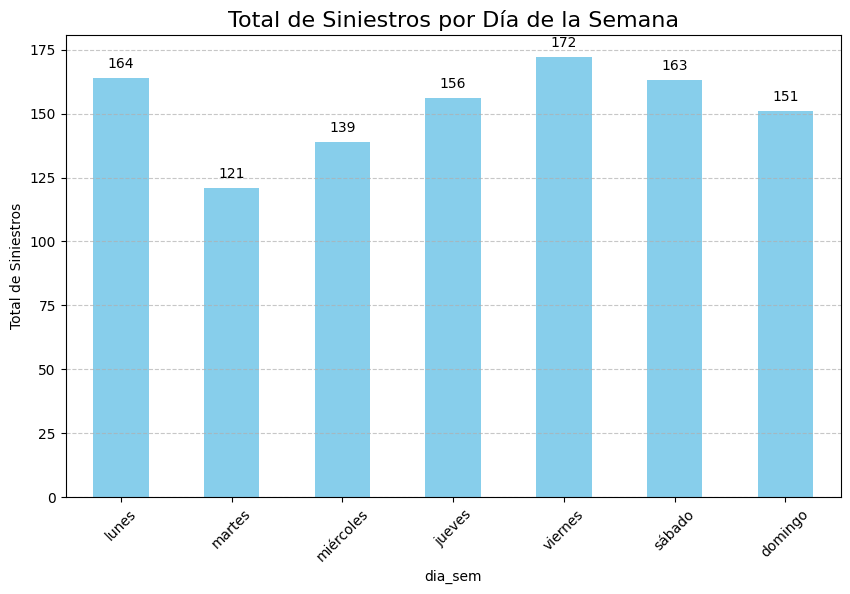

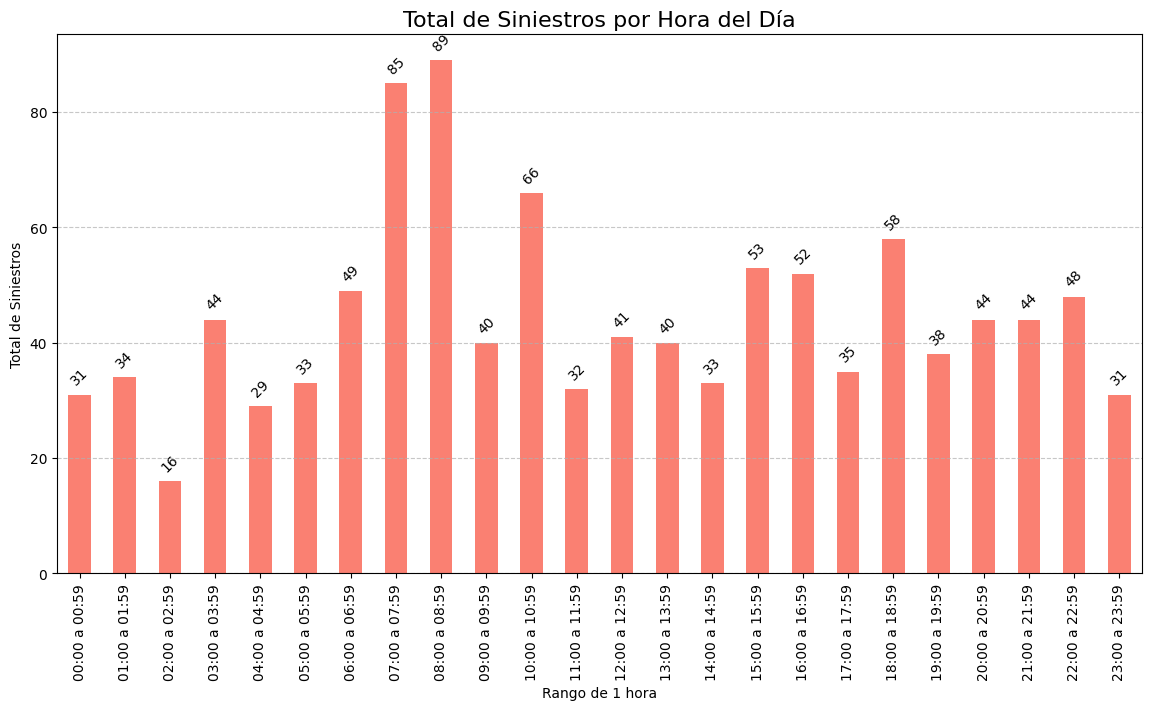

In [ ]:
# Análisis Temporal (CON ETIQUETAS)

if 'df_proyecto_lopez' in locals():
    
    # --- Gráfica 1: Por Día de la Semana ---
    orden_dias = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
    conteo_dias = df_proyecto_lopez['dia_sem'].value_counts().reindex(orden_dias)
    
    plt.figure(figsize=(10, 6)) # Un poco más alto para las etiquetas
    # Guardamos la gráfica en la variable 'ax'
    ax = conteo_dias.plot(kind='bar', color='skyblue')
    
    plt.title('Total de Siniestros por Día de la Semana', fontsize=16)
    plt.ylabel('Total de Siniestros')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # --- INICIO: Añadir etiquetas ---
    for p in ax.patches:
        # p.get_height() es el valor (altura) de la barra
        height = p.get_height()
        # p.get_x() + p.get_width() / 2 es la posición X (centrada)
        ax.annotate(
            f'{int(height)}', # El texto de la etiqueta (como entero)
            (p.get_x() + p.get_width() / 2, height), # Coordenadas (x, y)
            ha='center',      # Alineación horizontal
            va='bottom',      # Alineación vertical
            xytext=(0, 5),    # Desplazamiento de 5 puntos hacia arriba
            textcoords='offset points'
        )
    # --- FIN: Añadir etiquetas ---
    
    plt.savefig('grafica_siniestros_por_dia.png')
    plt.show()

    # --- Gráfica 2: Por Hora del Día ---
    conteo_horas = df_proyecto_lopez['rango_hora'].value_counts().sort_index()
    
    plt.figure(figsize=(14, 7)) # Un poco más alto
    ax2 = conteo_horas.plot(kind='bar', color='salmon')
    
    plt.title('Total de Siniestros por Hora del Día', fontsize=16)
    plt.ylabel('Total de Siniestros')
    plt.xlabel('Rango de 1 hora')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # --- INICIO: Añadir etiquetas ---
    for p in ax2.patches:
        height = p.get_height()
        ax2.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points',
            rotation=45 # Giramos un poco si los números están muy juntos
        )
    # --- FIN: Añadir etiquetas ---
    
    plt.savefig('grafica_siniestros_por_hora.png')
    plt.show()

else:
    print("ERROR: Ejecuta 'df_proyecto_lopez' primero.")

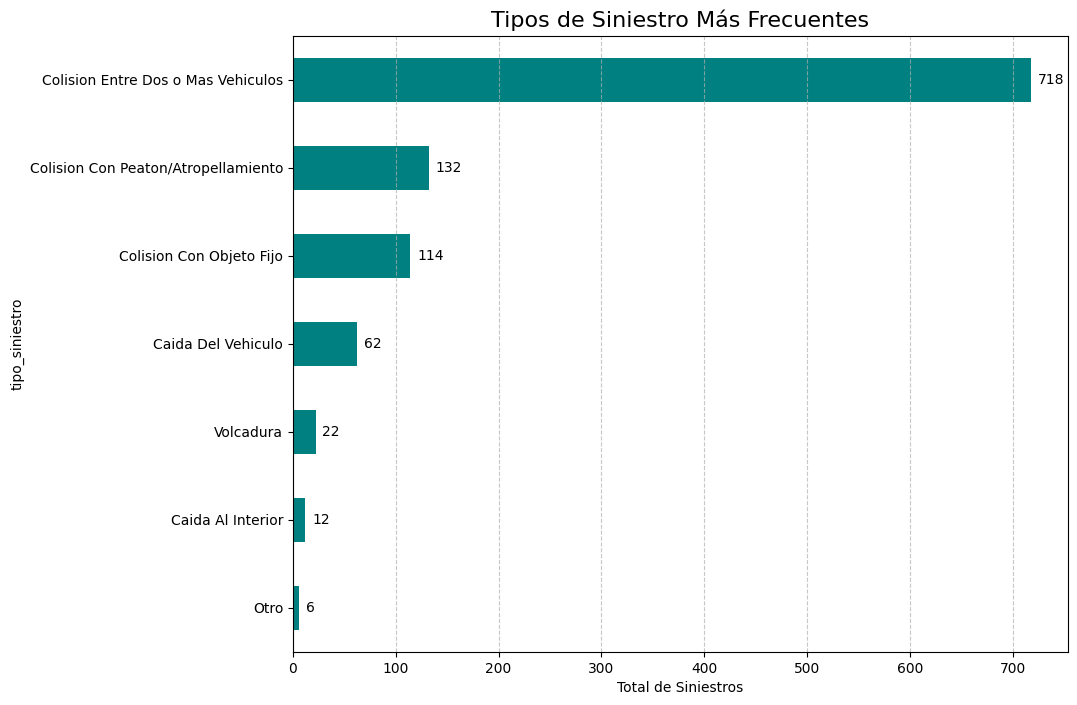

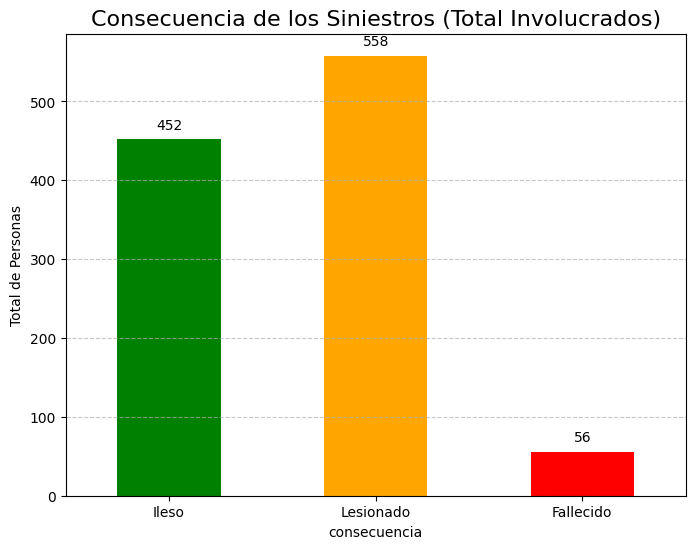

In [ ]:
# Análisis de Tipo y Consecuencia (CON ETIQUETAS)

if 'df_proyecto_lopez' in locals():
    
    # --- Gráfica 1: Tipos de Siniestro (Horizontal) ---
    plt.figure(figsize=(10, 8))
    conteo_tipos = df_proyecto_lopez['tipo_siniestro'].value_counts(ascending=True)
    ax = conteo_tipos.plot(kind='barh', color='teal')
    
    plt.title('Tipos de Siniestro Más Frecuentes', fontsize=16)
    plt.xlabel('Total de Siniestros')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # --- INICIO: Añadir etiquetas (para barh) ---
    # La lógica es la misma, pero con p.get_width() y p.get_y()
    for p in ax.patches:
        # p.get_width() es el valor (ancho) de la barra
        width = p.get_width()
        ax.annotate(
            f'{int(width)}', # El texto
            (width, p.get_y() + p.get_height() / 2), # Coordenadas (x, y)
            ha='left',      # Alineación horizontal a la izquierda
            va='center',    # Alineación vertical centrada
            xytext=(5, 0),  # Desplazamiento de 5 puntos a la derecha
            textcoords='offset points'
        )
    # --- FIN: Añadir etiquetas ---
    
    plt.savefig('grafica_tipo_siniestro.png')
    plt.show()

    # --- Gráfica 2: Consecuencia de los Siniestros ---
    orden_consec = ['Ileso', 'Lesionado', 'Fallecido']
    conteo_consec = df_proyecto_lopez['consecuencia'].value_counts().reindex(orden_consec)
    
    plt.figure(figsize=(8, 6)) # Un poco más alto
    ax2 = conteo_consec.plot(kind='bar', color=['green', 'orange', 'red'])
    
    plt.title('Consecuencia de los Siniestros (Total Involucrados)', fontsize=16)
    plt.ylabel('Total de Personas')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # --- INICIO: Añadir etiquetas ---
    for p in ax2.patches:
        height = p.get_height()
        ax2.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )
    # --- FIN: Añadir etiquetas ---
    
    plt.savefig('grafica_consecuencia_siniestro.png')
    plt.show()

else:
    print("ERROR: Ejecuta 'df_proyecto_lopez' primero.")

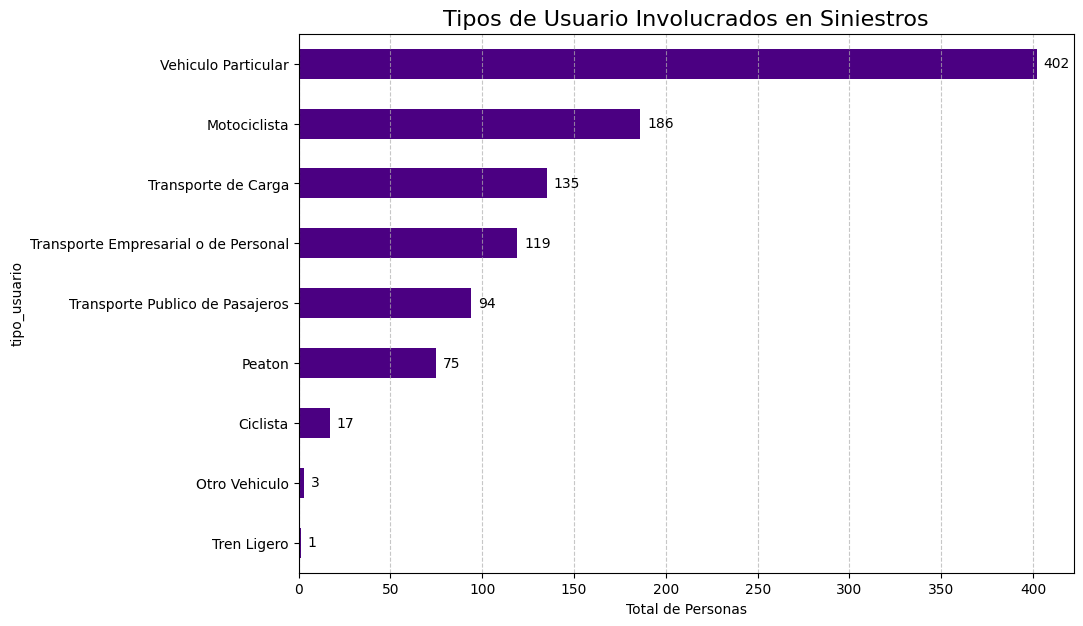

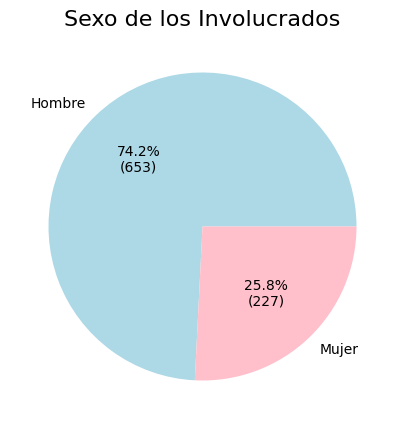

In [ ]:
# Análisis de Involucrados (CON ETIQUETAS)

if 'df_proyecto_lopez' in locals():
    
    # --- Gráfica 1: Tipo de Usuario (Horizontal) ---
    plt.figure(figsize=(10, 7))
    conteo_usuarios = df_proyecto_lopez['tipo_usuario'].value_counts(ascending=True)
    ax = conteo_usuarios.plot(kind='barh', color='indigo')
    
    plt.title('Tipos de Usuario Involucrados en Siniestros', fontsize=16)
    plt.xlabel('Total de Personas')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # --- INICIO: Añadir etiquetas (para barh) ---
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(
            f'{int(width)}',
            (width, p.get_y() + p.get_height() / 2),
            ha='left',
            va='center',
            xytext=(5, 0),
            textcoords='offset points'
        )
    # --- FIN: Añadir etiquetas ---
    
    plt.savefig('grafica_tipo_usuario.png')
    plt.show()

    # --- Gráfica 2: Sexo de Involucrados (Pie con conteo y %) ---
    plt.figure(figsize=(7, 5))
    conteo_sexo = df_proyecto_lopez['sexo'].value_counts()
    
    # --- MODIFICACIÓN: Función para mostrar % y número absoluto ---
    def formato_pie(pct, allvals):
        # pct es el porcentaje (calculado por autopct)
        # allvals es la serie de datos (conteo_sexo)
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute:d})"
    
    # Usamos un 'lambda' para llamar a nuestra función
    conteo_sexo.plot(
        kind='pie', 
        autopct=lambda pct: formato_pie(pct, conteo_sexo), 
        colors=['lightblue', 'pink', 'lightgrey']
    )
    # --- FIN MODIFICACIÓN ---
    
    plt.title('Sexo de los Involucrados', fontsize=16)
    plt.ylabel('')
    plt.savefig('grafica_sexo_involucrados.png')
    plt.show()

else:
    print("ERROR: Ejecuta 'df_proyecto_lopez' primero.")

# Sección 3 Imputación de características con KNN

In [24]:
df_proyecto_lopez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 141 to 48668
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 1066 non-null   object        
 1   fecha              1066 non-null   datetime64[ns]
 2   anio               1066 non-null   int64         
 3   mes                1066 non-null   object        
 4   dia                1066 non-null   float64       
 5   dia_sem            1066 non-null   object        
 6   rango_hora         1065 non-null   object        
 7   mun                1066 non-null   object        
 8   calle_1            1066 non-null   object        
 9   calle_2            1066 non-null   object        
 10  x                  1066 non-null   float64       
 11  y                  1066 non-null   float64       
 12  tipo_siniestro     1066 non-null   object        
 13  condicion_usuario  1066 non-null   object        
 14  tipo_usuar

In [ ]:
# Ingeniería de Características (KNN para Categóricos)

if 'df_proyecto_lopez' in locals():
    print("Iniciando creación de 'df_proyecto_lopez_corr'...")
    
    # --- 1. Crear una copia para el modelo ---
    df_proyecto_lopez_corr = df_proyecto_lopez.copy()

    # --- 2. Variables a IGNORAR (Dropping) ---
    # (Mantenemos calles temporalmente para la imputación de X/Y)
    cols_a_ignorar = ['Id', 'fecha', 'anio', 'dia']
    df_proyecto_lopez_corr = df_proyecto_lopez_corr.drop(columns=cols_a_ignorar, errors='ignore')

    # --- 4. Imputación KNN para Categóricos ---
    print("Iniciando imputación KNN para variables categóricas...")
    
    # A. Identificar categóricas con nulos
    cats_con_nulos = [col for col in df_proyecto_lopez_corr.select_dtypes(include=['object', 'category']).columns
                      if df_proyecto_lopez_corr[col].isnull().any() and col not in ['consecuencia']]
    
    if cats_con_nulos:
        print(f"Variables a imputar con KNN: {cats_con_nulos}")
        
        # B. "Disfrazar" de números (Ordinal Encoder)
        # Usamos un codificador que respeta los NaN
        encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
        
        # C. Crear un DF temporal solo con lo útil para KNN (coords + cats)
        # Usamos X, Y para ayudar a encontrar vecinos cercanos geográficamente
        df_para_knn = df_proyecto_lopez_corr[['x', 'y'] + cats_con_nulos].copy()
        
        # Codificamos las categóricas a números (manteniendo los NaN)
        df_para_knn[cats_con_nulos] = encoder.fit_transform(df_para_knn[cats_con_nulos])
        
        # D. Aplicar KNN Imputer
        # n_neighbors=5 suele ser un buen estándar
        knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
        matriz_imputada = knn_imputer.fit_transform(df_para_knn)
        
        # E. "Quitar el disfraz" (Inverse Transform)
        # Convertimos la matriz devuelta a DataFrame
        df_imputado_num = pd.DataFrame(matriz_imputada, columns=df_para_knn.columns, index=df_para_knn.index)
        
        # KNN puede devolver decimales (ej. 1.4), redondeamos a entero (ej. 1.0) para que vuelva a ser categoría
        for col in cats_con_nulos:
            df_imputado_num[col] = df_imputado_num[col].round()
            
        # Decodificamos de números a texto original
        df_proyecto_lopez_corr[cats_con_nulos] = encoder.inverse_transform(df_imputado_num[cats_con_nulos])
        print("¡Imputación KNN completada!")
    else:
        print("No se encontraron categóricas con nulos para KNN.")

    # --- 5. Codificación Final (Target y Features) ---
    # (Esto igual que antes)
    mapa_consecuencia = {'Ileso': 0, 'Lesionado': 1, 'Fallecido': 2}
    df_proyecto_lopez_corr['consecuencia_num'] = df_proyecto_lopez_corr['consecuencia'].map(mapa_consecuencia)

    hora_extract = pd.to_numeric(df_proyecto_lopez_corr['rango_hora'].astype(str).str.extract(r'(\d{1,2})')[0], errors='coerce')
    df_proyecto_lopez_corr['hora_num'] = hora_extract.fillna(hora_extract.median()).astype(int)

    mapa_edad = {'0-17': 0, '18-27': 1, '28-37': 2, '38-47': 3, '48-59': 4, '60+': 5}
    # NOTA: Si KNN ya rellenó 'rango_edad', ya no debería haber nulos aquí, pero dejamos el fillna(-1) por seguridad
    df_proyecto_lopez_corr['rango_edad_num'] = df_proyecto_lopez_corr['rango_edad'].map(mapa_edad).fillna(-1).astype(int)

    cols_nominales = ['mes', 'dia_sem', 'mun', 'tipo_siniestro', 'condicion_usuario', 'tipo_usuario', 'ibaen_atro', 'sexo']
    df_proyecto_lopez_corr = pd.get_dummies(df_proyecto_lopez_corr, columns=cols_nominales, drop_first=True)

    cols_finales_a_borrar = ['rango_hora', 'rango_edad', 'consecuencia', 'calle_1', 'calle_2']
    df_proyecto_lopez_corr = df_proyecto_lopez_corr.drop(columns=cols_finales_a_borrar, errors='ignore')

    print("\n--- 'df_proyecto_lopez_corr' listo (con KNN) ---")
    df_proyecto_lopez_corr.info()

else:
    print("ERROR: Ejecuta las celdas anteriores primero.")

Iniciando creación de 'df_proyecto_lopez_corr'...
Iniciando imputación KNN para variables categóricas...
Variables a imputar con KNN: ['rango_hora', 'tipo_usuario', 'ibaen_atro', 'sexo', 'rango_edad']
¡Imputación KNN completada!

--- 'df_proyecto_lopez_corr' listo (con KNN) ---
<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 141 to 48668
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   x                                                   1066 non-null   float64
 1   y                                                   1066 non-null   float64
 2   consecuencia_num                                    1066 non-null   int64  
 3   hora_num                                            1066 non-null   int64  
 4   rango_edad_num                                      1066 non-null   int64  
 5   mes_Agosto                                  

In [38]:
df_proyecto_lopez_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 141 to 48668
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   x                                                   1066 non-null   float64
 1   y                                                   1066 non-null   float64
 2   consecuencia_num                                    1066 non-null   int64  
 3   hora_num                                            1066 non-null   int64  
 4   rango_edad_num                                      1066 non-null   int64  
 5   mes_Agosto                                          1066 non-null   bool   
 6   mes_Diciembre                                       1066 non-null   bool   
 7   mes_Enero                                           1066 non-null   bool   
 8   mes_Febrero                                         1066 non-null   bool   
 9  

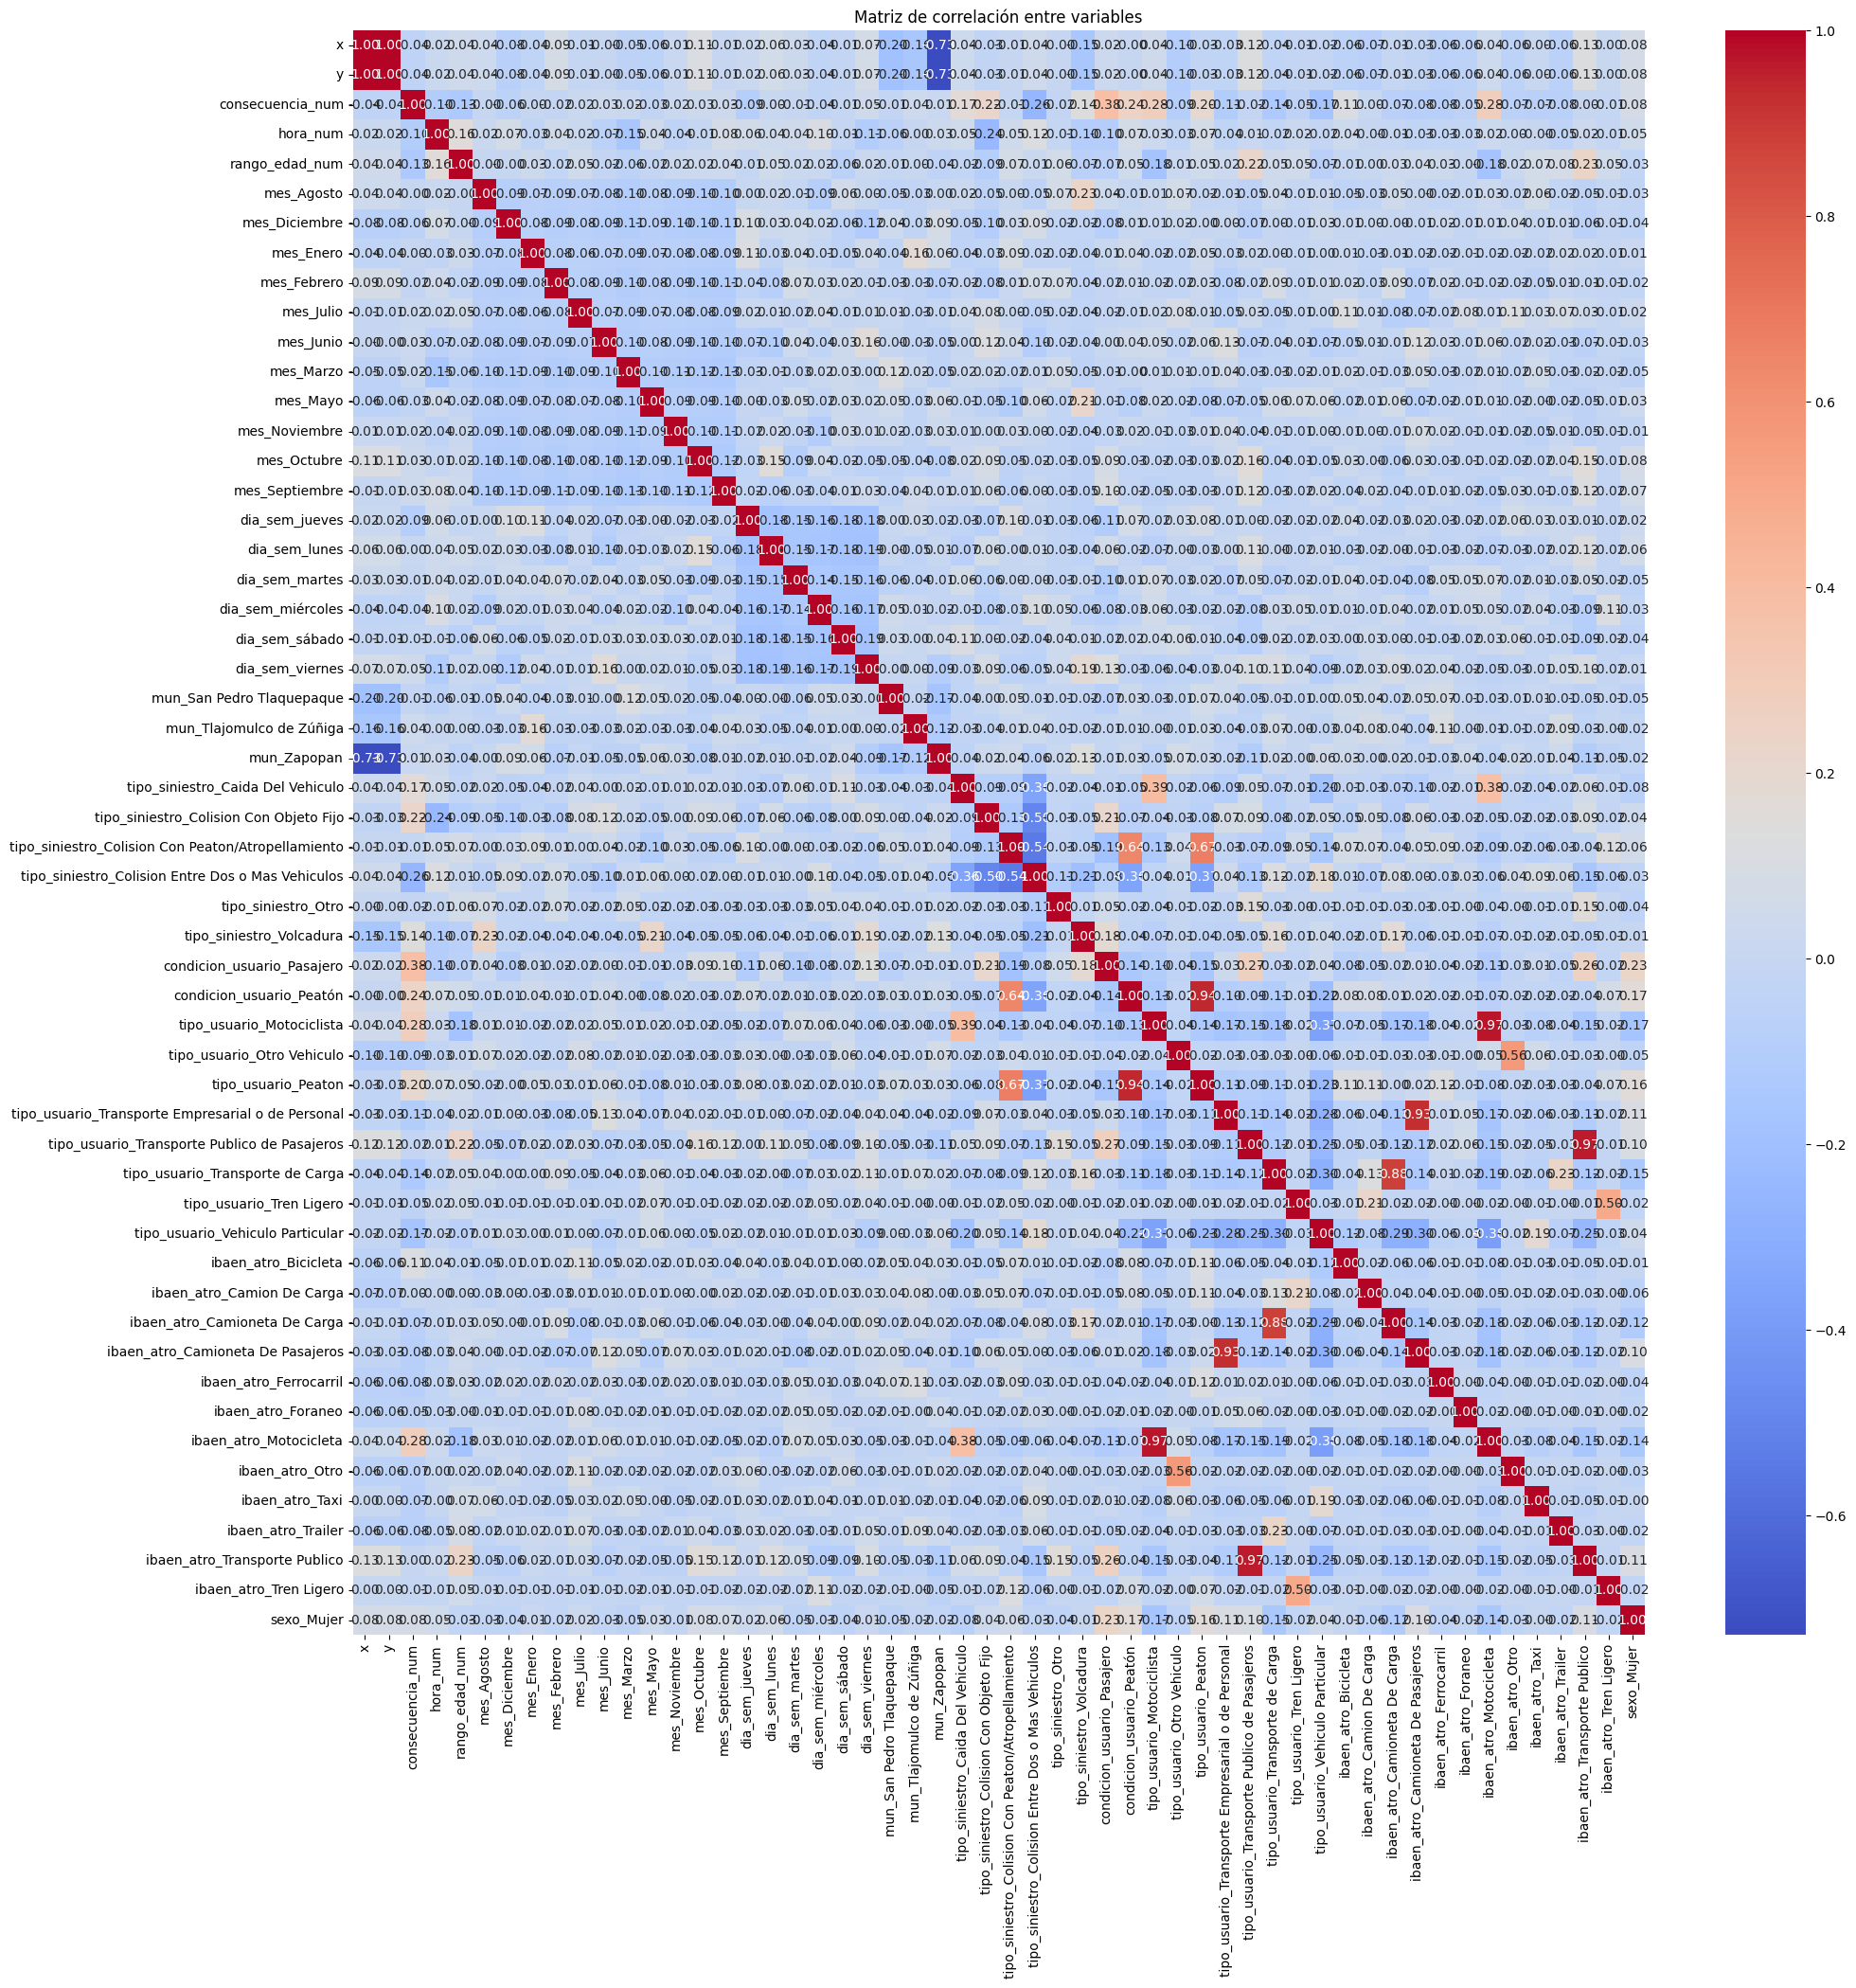

In [39]:
corr_matrix = df_proyecto_lopez_corr.corr()

# Heatmap
plt.figure(figsize=(22,22))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()